In [1]:
import numpy as np
import pandas as pd
from collections import deque
from tqdm import tqdm
import math
import time
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from pykrx import stock

from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

from company import Company
from minervini import Minervini
%load_ext autoreload
%autoreload 2

In [2]:
api_key = '#################################'

In [3]:
company = Company(api_key)

In [4]:
company.get_company_info()

Processing: 2609iteration [04:43, 11.81iteration/s]                             
100%|███████████████████████████████████| 2608/2608 [00:00<00:00, 361420.23it/s]
Processing: 2609iteration [04:43,  9.19iteration/s]


In [13]:
company_df = company.make_dataset(period=2)

 34%|█████████████▋                          | 854/2491 [02:49<05:45,  4.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['033340.KQ']: Exception('%ticker%: No data found, symbol may be delisted')
 37%|██████████████▋                         | 918/2491 [03:02<05:57,  4.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['065560.KQ']: Exception('%ticker%: No data found, symbol may be delisted')
 51%|███████████████████▋                   | 1258/2491 [04:14<04:24,  4.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['178780.KQ']: Exception('%ticker%: No data found, symbol may be delisted')
 55%|█████████████████████▎                 | 1358/2491 [04:37<04:22,  4.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['257370.KQ']: Exception('%ticker%: No timezone found, symbol may be delisted')
 55%|█████████████████████▍                 | 1367/2491 [04:39<04:33,  4.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['160600.KQ']: Exception('%ticker%: No tim

In [14]:
code_dict = dict()
for code, comp in company.company_dict.items():
    code_dict[comp[0]] = code 

In [15]:
minervini = Minervini(company_df)

In [16]:
minervini.filter_price()

100%|██████████████████████████████████████| 2491/2491 [00:02<00:00, 913.89it/s]


In [17]:
minervini.filter_eps(code_dict)

100%|███████████████████████████████████████████| 74/74 [03:50<00:00,  3.11s/it]


In [18]:
print(len(minervini.growth_finance))

24


LS


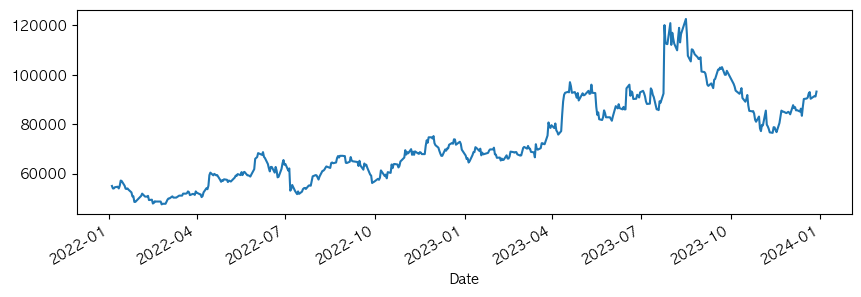

현대위아


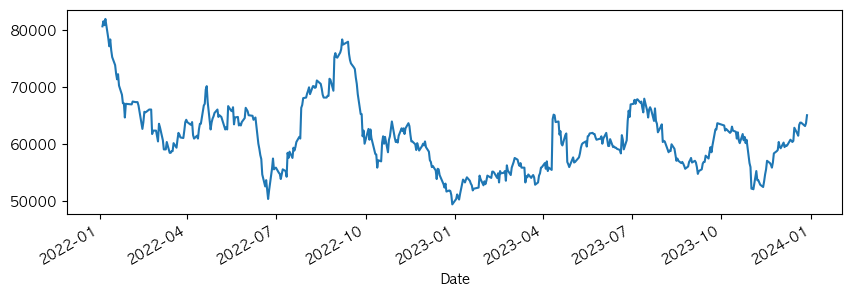

에스엘


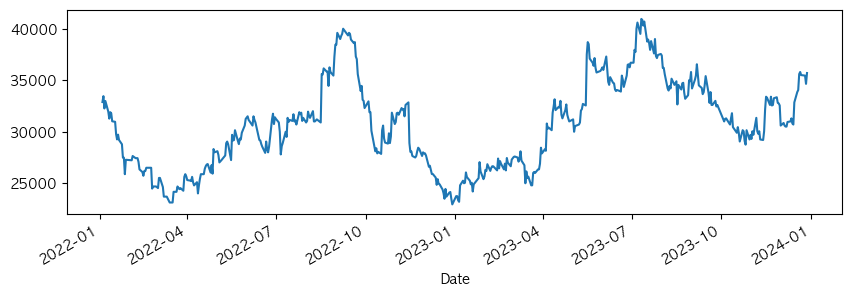

현대자동차


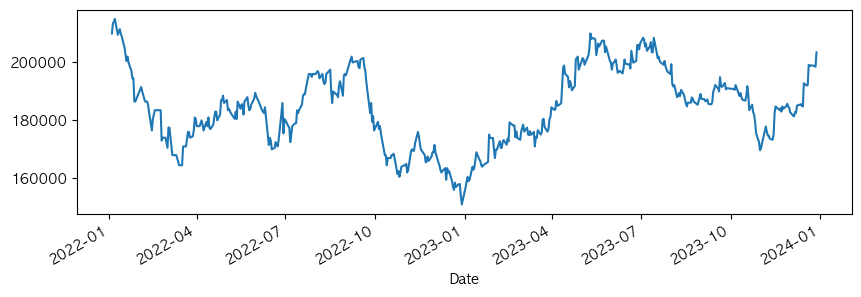

기아


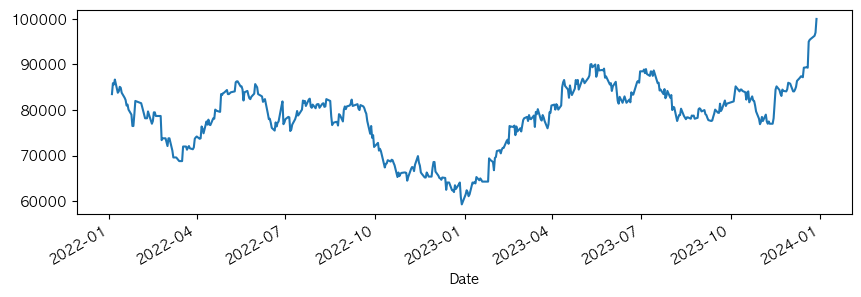

사조대림


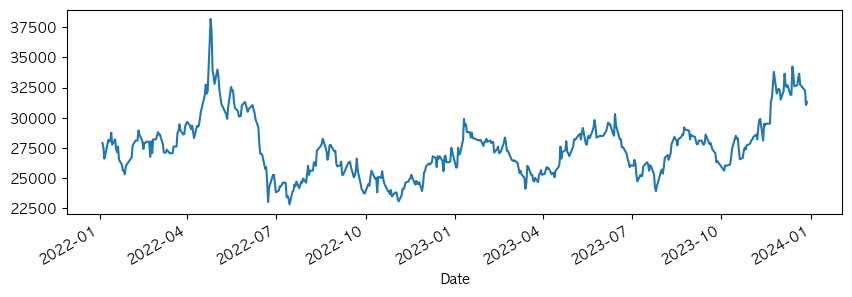

기업은행


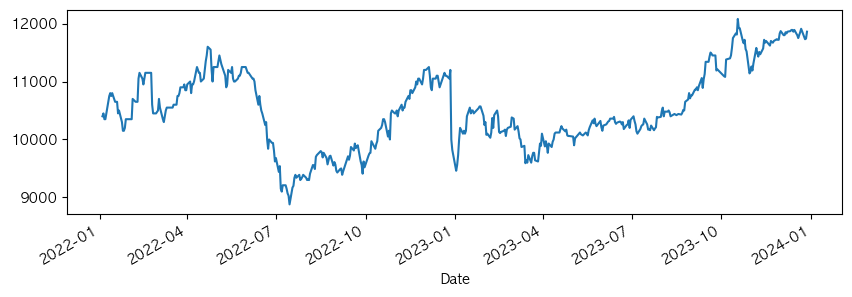

칩스앤미디어


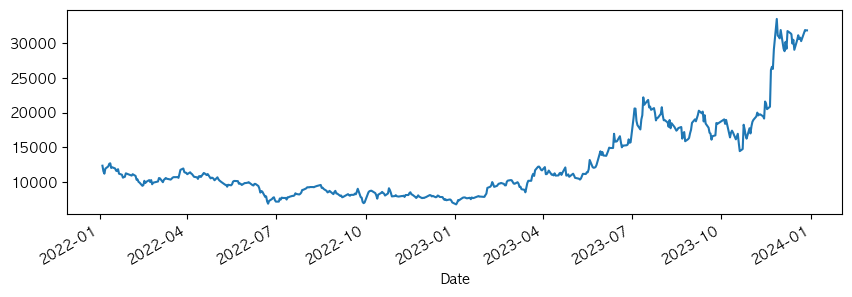

SNT에너지


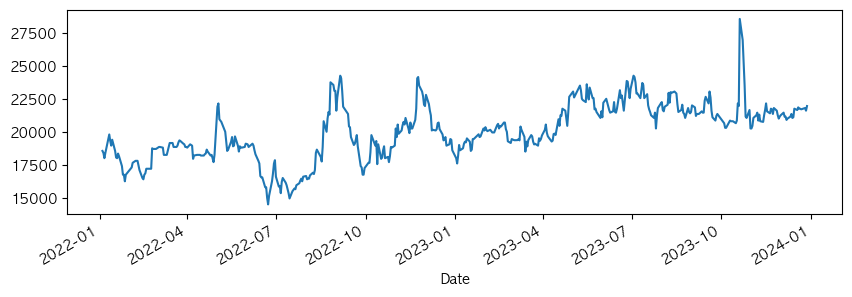

백산


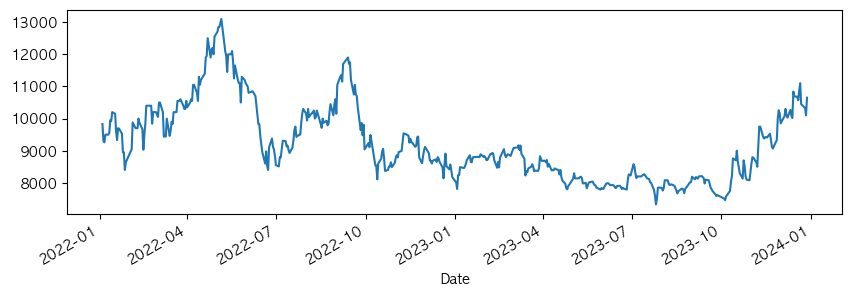

삼성에스디에스


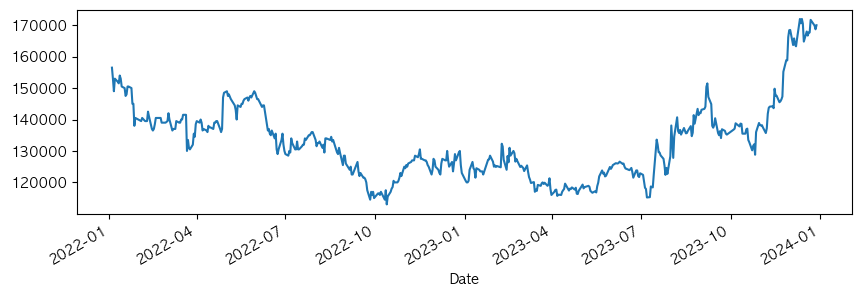

E1


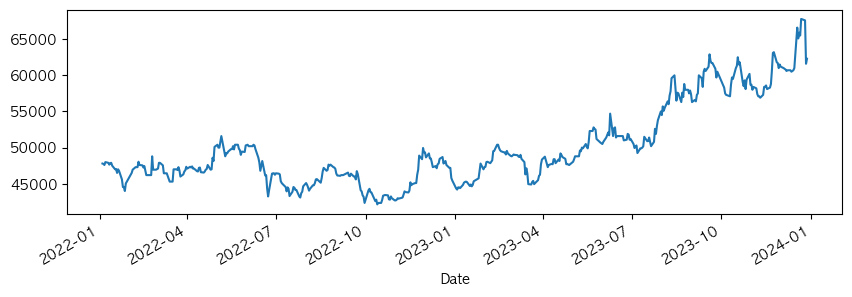

한진칼


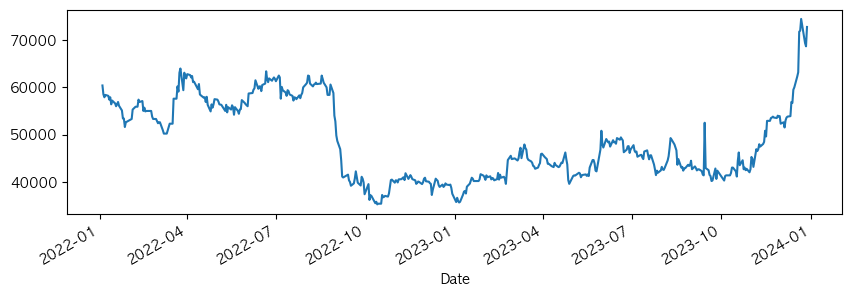

JB금융지주


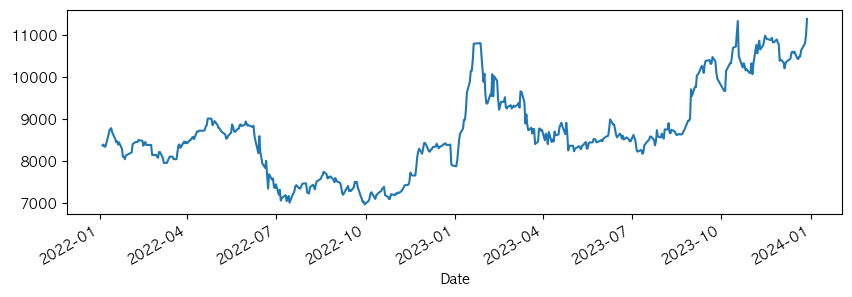

한국공항


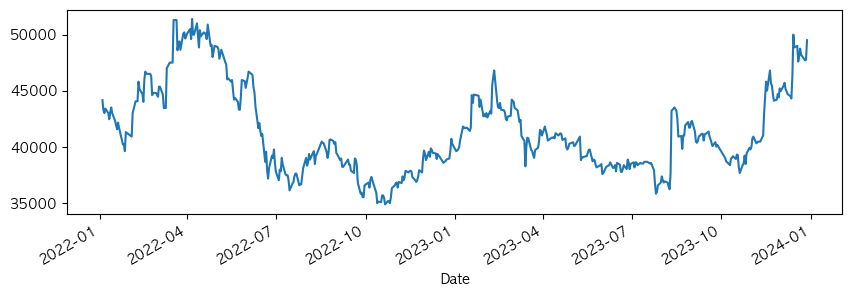

메리츠금융지주


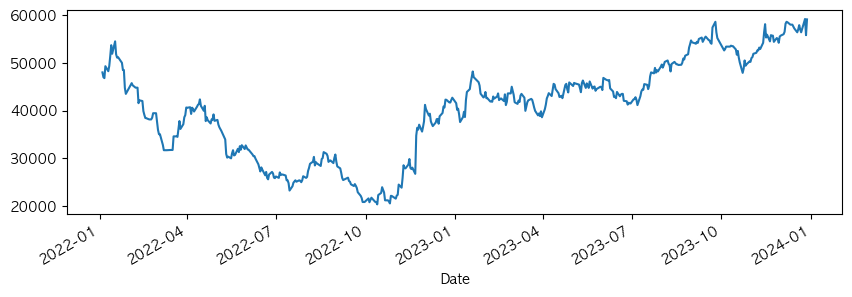

LIG넥스원


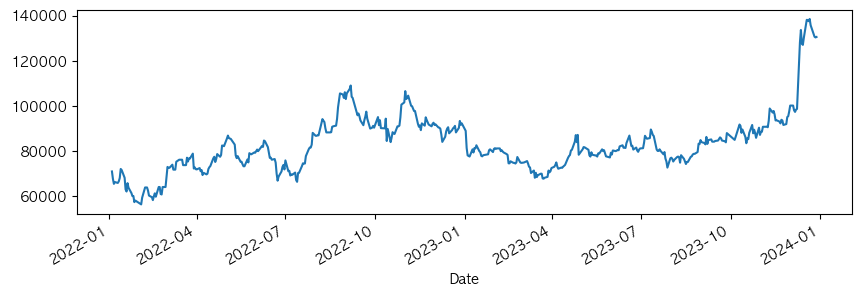

세아제강지주


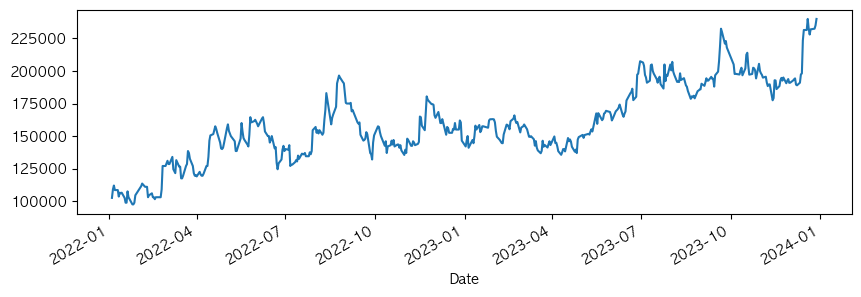

한국무브넥스


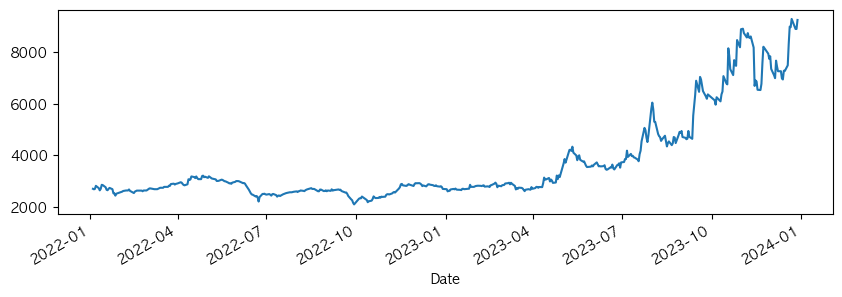

삼성전자


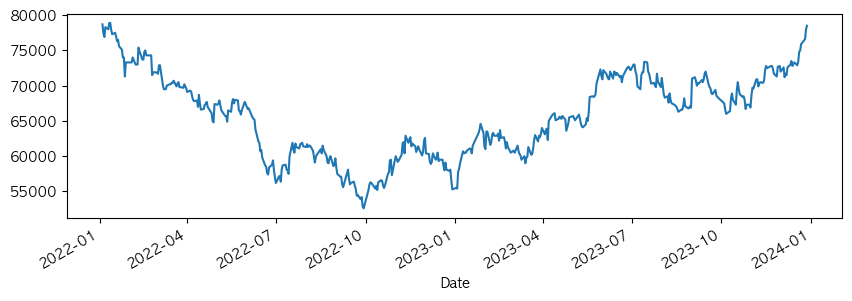

한미약품


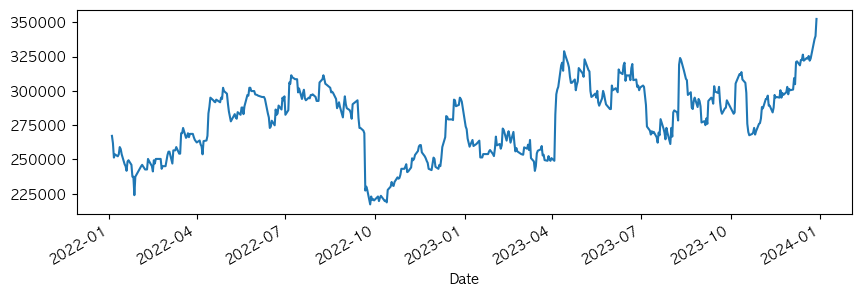

삼성화재해상보험


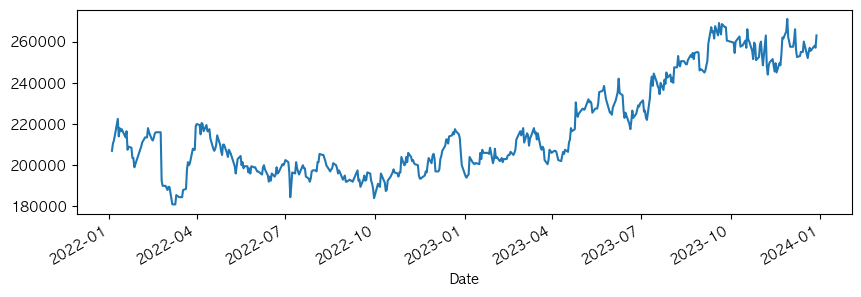

한국타이어앤테크놀로지


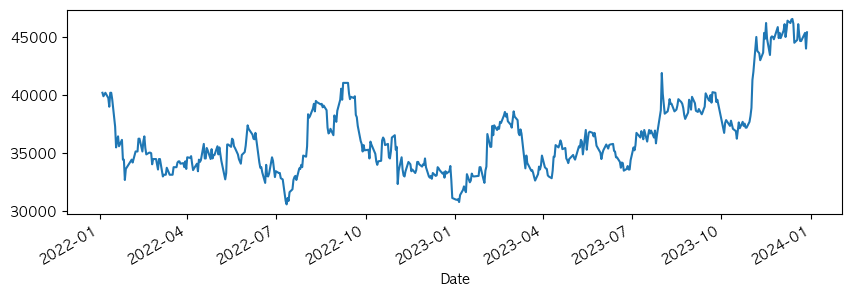

대동


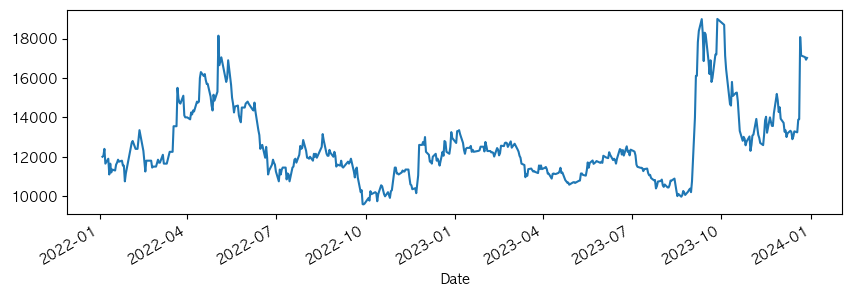

In [19]:
minervini.visualize()